# Peer-graded Assignment: Capstone Project - The Battle of Neighborhoods (Week 1)

# Introduction
Toronto is the capital city of the Canadian province of Ontario. It covers an area of 630 square kilometers, with a recorded 2016 population of 2,731,571 and an annual growth rate of 0.86%., it is the most populous city in Canada and the fourth most populous city in North America. 
Toronto is home to twenty public hospitals as well as a host to a wide variety of health-focused non-profit organizations that work to address specific illnesses.

Because of the growth rate and the good number of medical services, I am assuming that there might be great opportunity to open a pharmacy in Toronto area. For this reason, we are exploring Toronto neighborhoods using machine learning techniques to find the best location to open a pharmacy based on the nearby number of medical centers and population density of each neighborhood per square km.

### Target audience:
Investors who are trying to open a pharmacy business in the best location based on scientific data science.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geopy
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn import preprocessing

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

!pip install geopandas  # to extract data from GIS shapefiles
import geopandas as gpd
import matplotlib.pyplot as plt
import zipfile

print('Libraries imported.')

Libraries imported.


# Data

For this project, we will use data mainly from two sources:
1. Data of Toronto neighborhoods from the site **services.arcgis.com** which is shared by EsriCanadaEducation that include the arcgis shapefile of Toronto city including a dataset of city geometry, total area, total population, and other statistical information in regard to population per gender and age groups.
2. Data of pharmacy and medical centers venues that will be retrieved from **foursquare** site.


To start the project, we need first to install and import the required modules

## Data acqusition, processing and cleaning
### A. Toronto data neighbourhoods and statistics
The first dataset will be retrieved in a 3-steps procedure that will include:
1. downloading the data in a zipped file from the site opendata.arcgis.com
2. unarchive the zip file to lead to a set of related ESRI shapefiles (these are geospatial vector data format that can be read by geographic information system (GIS) software).
3. read the shapefile "Toronto_Neighbourhoods.shp" 
4. From the geometry field we will create two extra fields (latitude and longitude)


In [2]:
#step 1
url_data = 'https://opendata.arcgis.com/datasets/5fa0e4d94e3147b1b957b0d84641c7a1_0.zip?geometry=%7B%22xmin%22%3A-80.527%2C%22ymin%22%3A43.475%2C%22xmax%22%3A-78.244%2C%22ymax%22%3A43.823%2C%22type%22%3A%22extent%22%2C%22spatialReference%22%3A%7B%22wkid%22%3A4326%7D%7D'
myfile = requests.get(url_data, allow_redirects=True)
open('Toronto_Neighbourhoods.zip', 'wb').write(myfile.content)

#step2
with zipfile.ZipFile('Toronto_Neighbourhoods.zip', 'r') as f_zip:
    f_zip.extractall()   
    toronto_shape_map = gpd.read_file("Toronto_Neighbourhoods.shp")

#step3
toronto_data = toronto_shape_map.to_crs(epsg=4326)  # EPSG 4326 = WGS84 = https://epsg.io/4326

#step4
for i in range(0,len(toronto_data)):
    toronto_data.loc[i,'lon'] = toronto_data.iloc[i].geometry.centroid.x
    toronto_data.loc[i,'lat'] = toronto_data.iloc[i].geometry.centroid.y


In [3]:
toronto_data.shape

(140, 42)

We can see that the data contains 140 neighborhoods and 42 data fields and will retrieve the first 5 rows to explore them. 

In [4]:
toronto_data.head()

,OBJECTID,Neighbourh,Total_Area,Total_Popu,Pop_Males,Pop_Female,Pop0_4year,Pop5_9year,Pop10_14ye,Pop15_19ye,Pop20_24ye,Pop25_29ye,Pop30_34ye,Pop35_39ye,Pop40_44ye,Pop45_49ye,Pop50_54ye,Pop55_59ye,Pop60_64ye,Pop65_69ye,Pop70_74ye,Pop75_79ye,Pop80_84ye,Pop85years,Seniors55a,Seniors65a,Child0_14,Youth15_24,HomeLangua,Language_C,Language_I,Language_K,Language_P,Language_1,Language_R,Language_S,Language_T,Language_2,Language_U,geometry,lon,lat
0,1,Yonge-St.Clair,1.2,11655,5235,6420,395,345,235,285,645,1355,1125,900,860,755,715,760,820,755,525,445,365,395,4075,2505,985,925,11445,250,120,55,120,55,180,230,95,10,10,"POLYGON ((-79.39119 43.68108, -79.39141 43.680...",-79.397871,43.687859
1,2,York University Heights,13.2,27715,13580,14125,1645,1385,1380,1750,3280,2815,2120,1800,1820,1940,1750,1335,1150,870,890,825,545,395,6010,3545,4405,5040,26340,1750,2280,265,370,285,430,1475,930,1175,580,"POLYGON ((-79.50529 43.75987, -79.50488 43.759...",-79.488883,43.765738
2,3,Lansing-Westgate,5.4,14640,6950,7695,845,725,745,795,965,1185,1290,1170,1175,1150,1035,855,750,515,405,360,330,360,3565,1960,2300,1755,14285,995,165,580,630,90,770,320,460,15,45,"POLYGON ((-79.43998 43.76156, -79.44004 43.761...",-79.424747,43.754272
3,4,Yorkdale-Glen Park,5.9,14685,6750,7940,640,690,815,835,845,890,895,860,1050,1085,1030,850,765,610,690,755,690,700,5070,3450,2140,1690,13685,640,2950,50,70,810,85,625,605,120,60,"POLYGON ((-79.43969 43.70561, -79.44011 43.705...",-79.457108,43.714672
4,5,Stonegate-Queensway,7.9,24690,11935,12745,1395,1235,1265,1295,1190,1270,1575,1865,1990,2190,2120,1790,1515,940,830,755,635,825,7295,3985,3895,2465,23980,330,755,135,65,555,635,455,260,25,35,"POLYGON ((-79.49262 43.64744, -79.49277 43.647...",-79.501128,43.635518


We will clean the data to keep only fields that are related to our project which will include only Neighborhood, Total Population, Total Area, geometry, latitude, and longitude and rename these fields to give more sense names.

We will also create extra field called "pop_density" that will calculation population density per neighborhood based on neighborhood totsal area and total population.

In [5]:
toronto_data = toronto_data.drop(toronto_data.loc[:, 'Pop_Males':'Language_U'].columns, axis = 1) 
toronto_data = toronto_data.drop('OBJECTID',   axis='columns')
toronto_data = toronto_data.rename(columns={'Neighbourh': 'Neighborhood', 'Total_Popu': 'total_pop','Total_Area': 'total_area'})
toronto_data['pop_density'] = round(toronto_data.total_pop / toronto_data.total_area,2)


In [6]:
toronto_data.shape

(140, 7)

Now seven fields are kept in the dataset.

In [7]:
toronto_data.head()

,Neighborhood,total_area,total_pop,geometry,lon,lat,pop_density
0,Yonge-St.Clair,1.2,11655,"POLYGON ((-79.39119 43.68108, -79.39141 43.680...",-79.397871,43.687859,9712.50
1,York University Heights,13.2,27715,"POLYGON ((-79.50529 43.75987, -79.50488 43.759...",-79.488883,43.765738,2099.62
2,Lansing-Westgate,5.4,14640,"POLYGON ((-79.43998 43.76156, -79.44004 43.761...",-79.424747,43.754272,2711.11
3,Yorkdale-Glen Park,5.9,14685,"POLYGON ((-79.43969 43.70561, -79.44011 43.705...",-79.457108,43.714672,2488.98
4,Stonegate-Queensway,7.9,24690,"POLYGON ((-79.49262 43.64744, -79.49277 43.647...",-79.501128,43.635518,3125.32


### B. Toronto pharmacy and medical centers venues
For obtaining the venue details of each neighborhood, we have used the Foursquare location API, restricting our data to two main categories, **pharmacy** venues (4bf58dd8d48988d10f951735) and **medical centers** venues (4bf58dd8d48988d104941735). The following details have been retrieved:
venue name, category id, category name, venue latitude and longitude.

Defining Foursquare Credentials and Version

In [40]:
CLIENT_ID = '******' # your Foursquare ID
CLIENT_SECRET = '******' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ******
CLIENT_SECRET:******


Retrieving foursquare data

We will use the following function that will search for the pharmacies and medical centers venues with a limit of 100 venues within 450m radius of our neighborhoods centroids.

In [9]:
LIMIT = 100
# The following function retrieves the venues given the names and coordinates and stores it into dataframe.
def getNearbyVenues(names, latitudes, longitudes, radius=450,categoryId = '4bf58dd8d48988d10f951735,4bf58dd8d48988d104941735'):
#def getNearbyVenues(names, latitudes, longitudes, radius=500,search_query = 'Pharmacy'):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            categoryId,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
       
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['id'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue cat_id', 
                  'Venue Category']
    
    return(nearby_venues) 

In [10]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['lat'],
                                   longitudes=toronto_data['lon']
                                  )

Yonge-St.Clair
York University Heights
Lansing-Westgate
Yorkdale-Glen Park
Stonegate-Queensway
Tam O'Shanter-Sullivan
The Beaches
Thistletown-Beaumond Heights
Thorncliffe Park
Danforth-East York
Humewood-Cedarvale
Islington-City Centre West
Danforth
Rustic
Scarborough Village
South Parkdale
South Riverdale
St.Andrew-Windfields
Taylor-Massey
Humber Summit
Humbermede
Centennial Scarborough
Church-Yonge Corridor
Clairlea-Birchmount
Cliffcrest
Flemingdon Park
Corso Italia-Davenport
Ionview
Junction Area
Broadview North
Princess-Rosethorn
North Riverdale
Etobicoke West Mall
Forest Hill North
Glenfield-Jane Heights
Greenwood-Coxwell
Guildwood
Trinity-Bellwoods
Victoria Village
Waterfront Communities-The Island
West Hill
West Humber-Clairville
Westminster-Branson
Kennedy Park
Kingsview Village-The Westway
Bayview Woods-Steeles
Clanton Park
Keelesdale-Eglinton West
O'Connor-Parkview
Old East York
Casa Loma
Kensington-Chinatown
Kingsway South
Runnymede-Bloor West Village
Forest Hill South
Henry

Exploring the data to count the venues retrieved  

In [11]:
toronto_venues.groupby('Venue Category').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue cat_id
Venue Category,,,,,,,
Alternative Healer,4,4,4,4,4,4,4
Animal Shelter,1,1,1,1,1,1,1
Big Box Store,1,1,1,1,1,1,1
Chiropractor,3,3,3,3,3,3,3
Dentist's Office,32,32,32,32,32,32,32
Distribution Center,1,1,1,1,1,1,1
Doctor's Office,49,49,49,49,49,49,49
Emergency Room,2,2,2,2,2,2,2
Eye Doctor,1,1,1,1,1,1,1


We can see that some venues are wrongly flagged in foursquare.

Our next step is to remove unrelated venues and rename all medical centers back to their parent category (medical centers) so that we will end up in two categories (pharmacies and medical centers) 

In [12]:
print(toronto_venues.shape)
toronto_venues_med = toronto_venues[~toronto_venues['Venue Category'].str.contains('Animal Shelter|Big Box Store|Veterinarian|Grocery Store|Distribution Center')]
toronto_venues_med.loc[~toronto_venues_med['Venue Category'].isin(['Pharmacy']), 'Venue Category'] = "Medical center"
toronto_venues_med.head()

(303, 8)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue cat_id,Venue Category
0,Yonge-St.Clair,43.687859,-79.397871,Shoppers Drug Mart,43.689255,-79.394496,4bf58dd8d48988d10f951735,Pharmacy
1,Yonge-St.Clair,43.687859,-79.397871,Sports & Exercise Medicine Institute (SEMI),43.687868,-79.395651,4bf58dd8d48988d104941735,Medical center
2,Yonge-St.Clair,43.687859,-79.397871,Rexall,43.688467,-79.393801,4bf58dd8d48988d10f951735,Pharmacy
3,Yonge-St.Clair,43.687859,-79.397871,Rexall Pharma Plus,43.688628,-79.393741,4bf58dd8d48988d10f951735,Pharmacy
4,Yonge-St.Clair,43.687859,-79.397871,The Health Shoppe - North,43.686625,-79.393497,4bf58dd8d48988d10f951735,Pharmacy


In [13]:
toronto_venues_med.groupby('Venue Category').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue cat_id
Venue Category,,,,,,,
Medical center,205,205,205,205,205,205,205
Pharmacy,85,85,85,85,85,85,85


For the sake of our analysis, we will depend on the count of pharmacies and medical centers in each neighborhood.

Therefore, we convert our foursquare datasets into counts of each category in each neighborhood.


In [14]:
toronto_venues_med['count'] = 1
toronto_venues_counts = (toronto_venues_med.pivot_table(index=['Neighborhood'],columns='Venue Category', values='count', fill_value=0, aggfunc=np.sum)
       .reset_index()
       .rename_axis(None, axis=1))
toronto_venues_counts.head()


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Neighborhood,Medical center,Pharmacy
0,Agincourt South-Malvern West,2,1
1,Alderwood,2,0
2,Annex,3,0
3,Banbury-Don Mills,1,1
4,Bay Street Corridor,48,14


In [15]:
toronto_venues_counts.shape


(67, 3)

#### Data merging
The final steps in data preparation include:
1. Merge data from both data sources into one final dataset
2. Remove any neighborhood that does not contain any pharmacy or medical centers.
3. Create extra field called pharmacy difference (the difference between the count of pharmacies and medical centers)


In [16]:
toronto_neigh_venues = toronto_data.join(toronto_venues_counts.set_index('Neighborhood'), on='Neighborhood')
toronto_neigh_venues.head()

,Neighborhood,total_area,total_pop,geometry,lon,lat,pop_density,Medical center,Pharmacy
0,Yonge-St.Clair,1.2,11655,"POLYGON ((-79.39119 43.68108, -79.39141 43.680...",-79.397871,43.687859,9712.50,11.0,4.0
1,York University Heights,13.2,27715,"POLYGON ((-79.50529 43.75987, -79.50488 43.759...",-79.488883,43.765738,2099.62,1.0,1.0
2,Lansing-Westgate,5.4,14640,"POLYGON ((-79.43998 43.76156, -79.44004 43.761...",-79.424747,43.754272,2711.11,NaN,NaN
3,Yorkdale-Glen Park,5.9,14685,"POLYGON ((-79.43969 43.70561, -79.44011 43.705...",-79.457108,43.714672,2488.98,4.0,1.0
4,Stonegate-Queensway,7.9,24690,"POLYGON ((-79.49262 43.64744, -79.49277 43.647...",-79.501128,43.635518,3125.32,NaN,NaN


In [17]:
toronto_neigh_venues.dropna(axis=0,inplace=True)
toronto_neigh_venues.head()

,Neighborhood,total_area,total_pop,geometry,lon,lat,pop_density,Medical center,Pharmacy
0,Yonge-St.Clair,1.2,11655,"POLYGON ((-79.39119 43.68108, -79.39141 43.680...",-79.397871,43.687859,9712.50,11.0,4.0
1,York University Heights,13.2,27715,"POLYGON ((-79.50529 43.75987, -79.50488 43.759...",-79.488883,43.765738,2099.62,1.0,1.0
3,Yorkdale-Glen Park,5.9,14685,"POLYGON ((-79.43969 43.70561, -79.44011 43.705...",-79.457108,43.714672,2488.98,4.0,1.0
5,Tam O'Shanter-Sullivan,5.5,27390,"POLYGON ((-79.31979 43.76836, -79.31988 43.768...",-79.302918,43.780130,4980.00,4.0,2.0
6,The Beaches,3.6,21135,"POLYGON ((-79.31485 43.66674, -79.31356 43.667...",-79.299600,43.671050,5870.83,2.0,1.0


In [18]:
toronto_neigh_venues['pharmacy_diff'] = toronto_neigh_venues.Pharmacy - toronto_neigh_venues['Medical center']
toronto_neigh_venues.head()

,Neighborhood,total_area,total_pop,geometry,lon,lat,pop_density,Medical center,Pharmacy,pharmacy_diff
0,Yonge-St.Clair,1.2,11655,"POLYGON ((-79.39119 43.68108, -79.39141 43.680...",-79.397871,43.687859,9712.50,11.0,4.0,-7.0
1,York University Heights,13.2,27715,"POLYGON ((-79.50529 43.75987, -79.50488 43.759...",-79.488883,43.765738,2099.62,1.0,1.0,0.0
3,Yorkdale-Glen Park,5.9,14685,"POLYGON ((-79.43969 43.70561, -79.44011 43.705...",-79.457108,43.714672,2488.98,4.0,1.0,-3.0
5,Tam O'Shanter-Sullivan,5.5,27390,"POLYGON ((-79.31979 43.76836, -79.31988 43.768...",-79.302918,43.780130,4980.00,4.0,2.0,-2.0
6,The Beaches,3.6,21135,"POLYGON ((-79.31485 43.66674, -79.31356 43.667...",-79.299600,43.671050,5870.83,2.0,1.0,-1.0


In [19]:
toronto_neigh_venues.shape

(67, 10)

# Methodology

As the dataset has been retreived from the different sources, cleaned and finalized, data analysis started with the following methods.

Exploratory data analysis through:

Simple descriptive analysis using the describe() function to computes a summary of statistics pertaining to the DataFrame columns.  

Simple horizontal bar chart to compare between the two venues categories counts against neighborhoods.

The folium library to show the Toronto neighborhoods and venues. Folium is a python library that can create interactive leaflet map using coordinate data. We used both the choropleth method to show the neighborhoods polygons classified by population density of each neighborhood overlayed by the venues markers classified into two categories and colors, the blue markers for the pharmacies and the red marker for the medical centers.

Inferential statistical through Correlation analysis to see if there are relationships between the variables. Correlation is a measure of a mutual relationship between two variables whether they are related or not. Pearson Correlation is one of the most used correlations during the data analysis process. it measures the linear relationship between variable continuous X and variable continuous Y and has a value between 1 and -1. In other words, the Pearson Correlation Coefficient measures the relationship between 2 variables via a line.

Predictive Modelling through Clustering the neighborhoods (by utilizing Sci-kit learn package of python) based on the venues counts and population density using K-Means clustering. In order to determine the optimal number of clusters into which the data may be clustered, we used the elbow method which is one of the most popular methods to determine this optimal value of k. Dataset was first processed to remove unrelated variables which were then normalized used min-max scaling. Again we used folium library to draw the neighborhoods clusters.


# Results

## Descriptive analysis

In [20]:
toronto_data.describe()

,total_area,total_pop,lon,lat,pop_density
count,140.000000,140.000000,140.000000,140.000000,140.000000
mean,4.523500,18676.928571,-79.400186,43.708841,5995.445000
std,4.598499,9099.209342,0.102044,0.051274,4673.179071
min,0.400000,6490.000000,-79.596364,43.592362,990.340000
25%,1.800000,11851.250000,-79.479794,43.671009,3458.687500
50%,3.300000,16367.500000,-79.403989,43.702021,5022.865000
75%,5.400000,22410.000000,-79.331097,43.747295,7250.617500
max,37.600000,53350.000000,-79.150844,43.821202,44562.500000


In [21]:
toronto_data.sum()

Neighborhood    Yonge-St.ClairYork University HeightsLansing-W...
total_area                                                 633.29
total_pop                                                 2614770
lon                                                        -11116
lat                                                       6119.24
pop_density                                                839362
dtype: object

In [22]:
toronto_neigh_venues.describe()

,total_area,total_pop,lon,lat,pop_density,Medical center,Pharmacy,pharmacy_diff
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,3.719403,19197.686567,-79.405104,43.699358,7427.915522,3.059701,1.268657,-1.791045
std,2.951591,8365.716443,0.095618,0.050892,6022.503050,6.492141,1.981598,4.903732
min,0.400000,7655.000000,-79.587260,43.592362,2099.620000,0.000000,0.000000,-34.000000
25%,1.600000,12265.000000,-79.465841,43.661249,4201.205000,0.000000,0.000000,-2.000000
50%,2.900000,17825.000000,-79.403978,43.689468,6258.820000,1.000000,1.000000,-1.000000
75%,5.050000,22675.000000,-79.342335,43.730774,8548.235000,3.000000,1.500000,1.000000
max,16.400000,45085.000000,-79.177472,43.812959,44562.500000,48.000000,14.000000,2.000000


In [23]:
toronto_neigh_venues.sum()

Neighborhood      Yonge-St.ClairYork University HeightsYorkdale-...
total_area                                                    249.2
total_pop                                                   1286245
lon                                                        -5320.14
lat                                                         2927.86
pop_density                                                  497670
Medical center                                                  205
Pharmacy                                                         85
pharmacy_diff                                                  -120
dtype: object

From the original dataset we found that Totonto city has 140 neighborhoods with a total area of 633.29 sq km and a total population of 2,614,770. The average area of the neighborhoods is about 4.5 Square km with standard deviation of 4.6 sq km. The average population per neighborhood is 18676.9 person with standard deviation of 9099 while the average population density is about 5995 person per sq km with a standard deviation of 4673 person per sq km.

After merging and cleaning the data, we find that there  are 205 medical centers and 85 pharmacies distributed in 67 neighborhoods. A total of 73 neighborhoods are left uncovered with medical centers and pharmacies. These uncovered neighborhoods were removed from our final data as there are no coordinates to draw on the map.

The following bar graph shows that Bay street corridor is the most neighborhood that has the most medical centers (48) and pharmacies (14) followed by Playter Eastates-Danforth, Church-Yonge Corridor and Yonge-St. Clair.


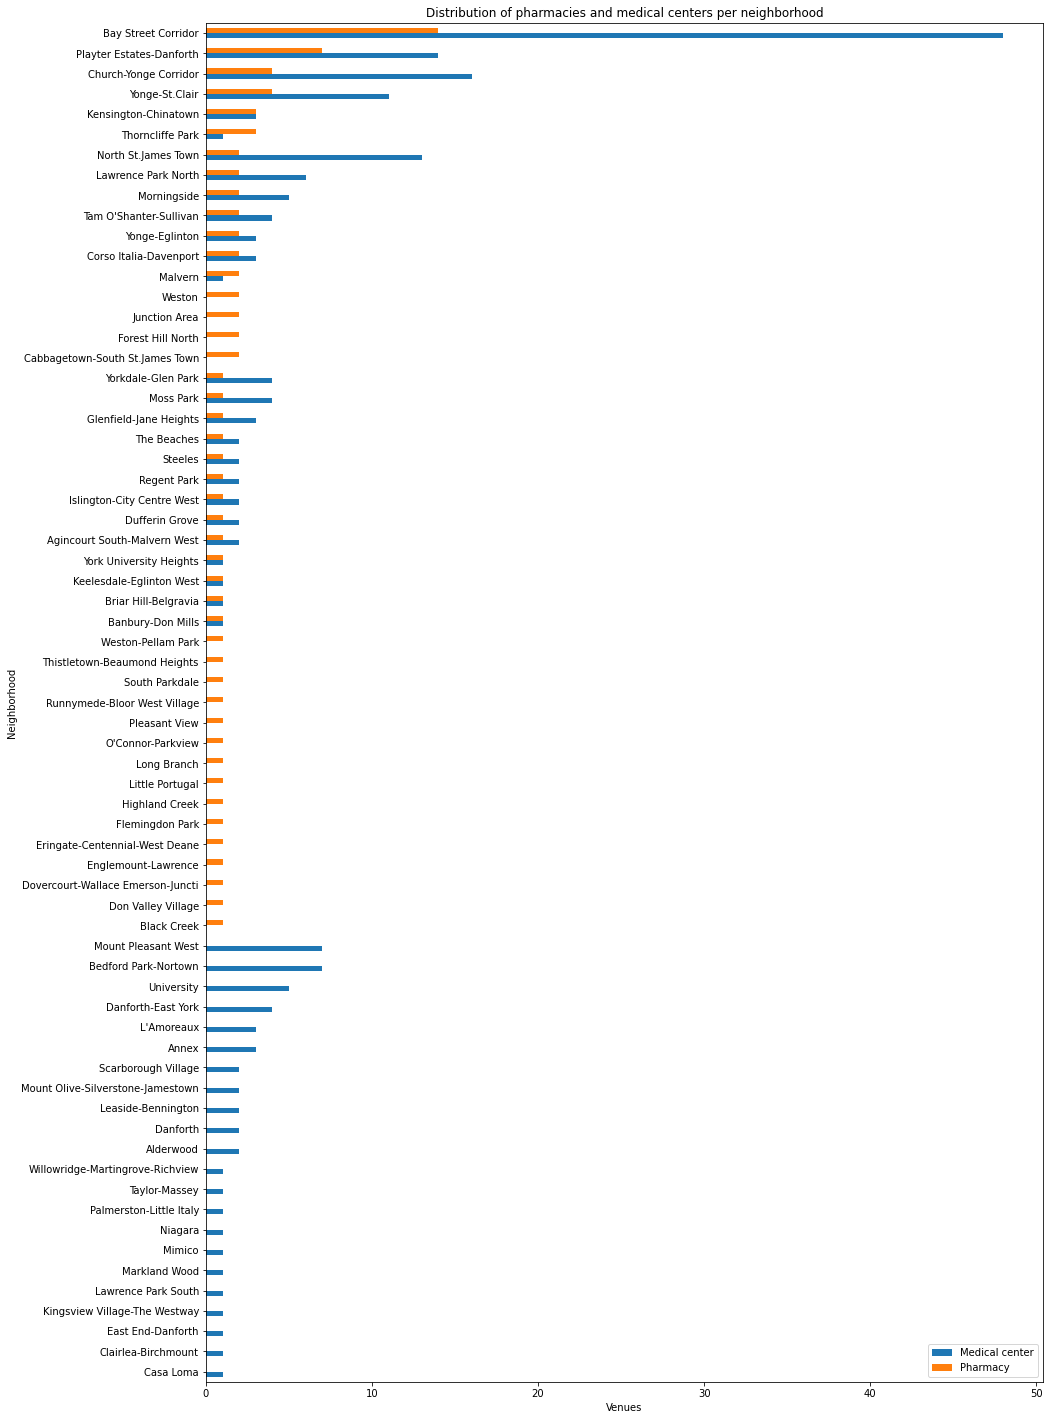

In [24]:
toronto_venues_sorted = toronto_venues_counts.sort_values(by=['Pharmacy','Medical center'], ascending=True)
toronto_venues_sorted.plot(x="Neighborhood", y=["Medical center","Pharmacy"], kind='barh',figsize=(15,25))
plt.title('Distribution of pharmacies and medical centers per neighborhood')
plt.xlabel('Venues')
plt.ylabel('Neighborhood')
plt.show()

### Mapping the datasets

By using Toronto city as the base map, we draw Toronto city neighborhoods  polygons based on the population density as well as draw the venues as markers.

In [25]:
address = 'Toronto, Ontario Canada'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto Canada are 43.6534817, -79.3839347.


In [26]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

scale_percentile = (toronto_data['pop_density'].quantile((0,0.1,0.75,0.9,0.98,1))).tolist()
np_array = np.array(scale_percentile)
np_round = np.round(np_array)
threshold_scale = list(map(int, np_round))
threshold_scale[-1] = threshold_scale[-1] + 1 #make sure that the last value of the list is greater than the maximum

map_toronto.choropleth(
 geo_data=toronto_data,
 name='Choropleth',
 data=toronto_data,
 columns=['Neighborhood','pop_density'],
 key_on="feature.properties.Neighborhood",
 fill_color='YlGnBu',
 threshold_scale=threshold_scale,
 fill_opacity=0.7,
 line_opacity=0.5,
 legend_name='Total population',
 smooth_factor=0.5,
 highlight=True
)

# add pharmacy venue markers to map
toronto_venues_pharmacy = toronto_venues_med[toronto_venues_med['Venue Category'].str.contains("Pharmacy")]

for lat, lng, Neighborhood, category in zip(toronto_venues_pharmacy['Venue Latitude'], toronto_venues_pharmacy['Venue Longitude'], toronto_venues_pharmacy['Neighborhood'], toronto_venues_pharmacy['Venue Category']):
    label = '{}, {}'.format(Neighborhood, category)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='#01016f',
        fill=True,
        fill_color='#01016f',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
# add medical centers venue markers to map
toronto_venues_med_centers = toronto_venues_med[toronto_venues_med['Venue Category'].str.contains("Medical center")]

for lat, lng, Neighborhood, category in zip(toronto_venues_med_centers['Venue Latitude'], toronto_venues_med_centers['Venue Longitude'], toronto_venues_med_centers['Neighborhood'], toronto_venues_med_centers['Venue Category']):
    label = '{}, {}'.format(Neighborhood, category)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        popup=label,
        color='#d8031c',
        fill=True,
        fill_color='#d8031c',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  

map_toronto

#### Relationship between variables

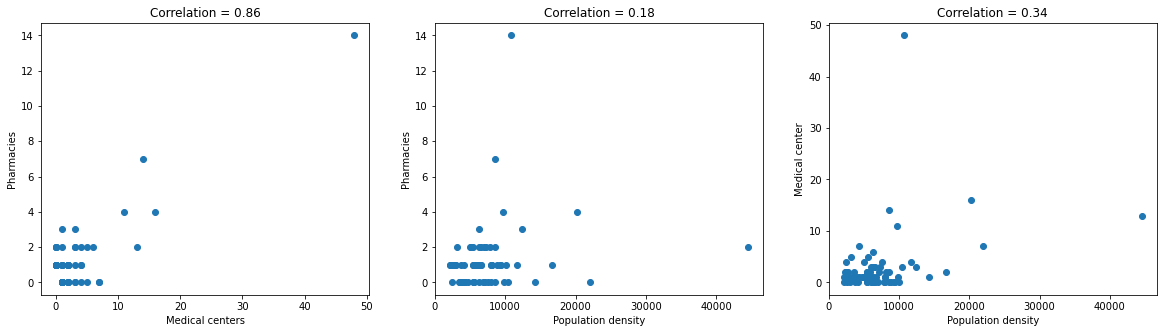

In [27]:

corr_center = np.corrcoef(toronto_neigh_venues['Pharmacy'], toronto_neigh_venues['Medical center'])
corr_area = np.corrcoef(toronto_neigh_venues['Pharmacy'], toronto_neigh_venues['pop_density'])
corr_density = np.corrcoef(toronto_neigh_venues['Medical center'], toronto_neigh_venues['pop_density'])

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
ax[0].scatter(x = toronto_neigh_venues['Medical center'], y = toronto_neigh_venues['Pharmacy'])
ax[0].set_xlabel("Medical centers")
ax[0].title.set_text('Correlation = ' + "{:.2f}".format(corr_center[0,1]))
ax[0].set_ylabel("Pharmacies")

ax[1].scatter(x = toronto_neigh_venues['pop_density'], y = toronto_neigh_venues['Pharmacy'])
ax[1].set_xlabel("Population density")
ax[1].title.set_text('Correlation = ' + "{:.2f}".format(corr_area[0,1]))
ax[1].set_ylabel("Pharmacies")

ax[2].scatter(x = toronto_neigh_venues['pop_density'], y = toronto_neigh_venues['Medical center'])
ax[2].set_xlabel("Population density")
ax[2].title.set_text('Correlation = ' + "{:.2f}".format(corr_density[0,1]))
ax[2].set_ylabel("Medical center")

plt.show()

We found that there is a strong relationship (correlation = 0.86) between the count of pharmacies and the count of medical centers within a neighborhood, no relationship between population density and pharmacies (correlation = 0.18) while there is weak relationship between population density and medical centers (correlation = 0.34).

## Clustering of neighborhoods



#### Preprocessing and normalizing data
To start clustering neighborhoods, we need first to keep only columns we are interested in which are population density and the difference between medical centers count per neighborhood and pharmacies.

In [28]:
toronto_neigh_venues_norm = toronto_neigh_venues.drop(['Neighborhood','total_area','total_pop','geometry','lon','lat','Medical center','Pharmacy'], 1)
toronto_neigh_venues_norm.head()

,pop_density,pharmacy_diff
0,9712.50,-7.0
1,2099.62,0.0
3,2488.98,-3.0
5,4980.00,-2.0
6,5870.83,-1.0


Since the range of values among the categories is significant, our next step is to normalize our values to minimize the distortion differences in the ranges of values and give them all equal importance. Scaling is also important from a clustering perspective as the distance between points affects the way clusters are formed.

In [29]:
scaler = preprocessing.MinMaxScaler()
names = toronto_neigh_venues_norm.columns
d = scaler.fit_transform(toronto_neigh_venues_norm)
toronto_neigh_venues_norm = pd.DataFrame(d, columns=names)
toronto_neigh_venues_norm.head()

,pop_density,pharmacy_diff
0,0.179283,0.750000
1,0.000000,0.944444
2,0.009169,0.861111
3,0.067833,0.888889
4,0.088812,0.916667


#### Elbow method to determine  k value


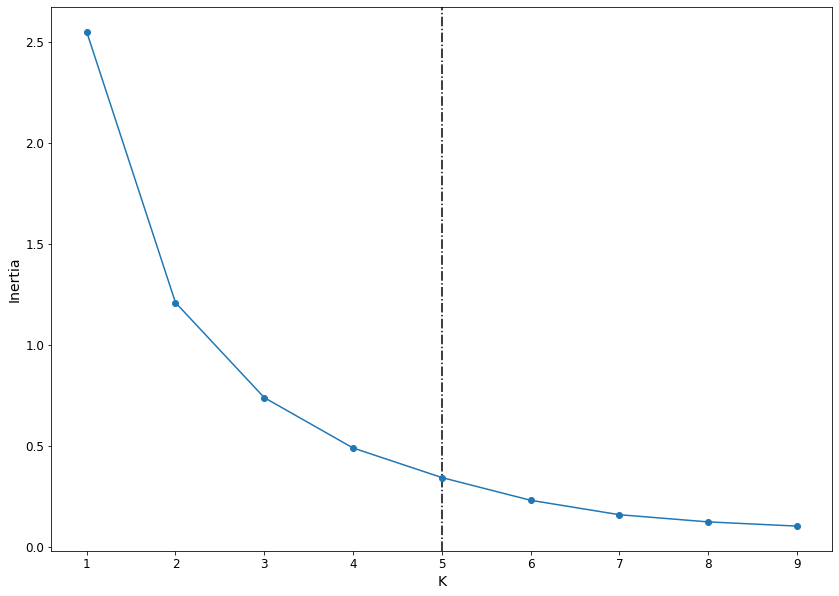

In [30]:
def plot_elbow(w, h, kmeans):
    plt.figure(figsize = (w,h))
    plt.axvline(x=5, linestyle='-.', c="black")
    plt.plot(range(1,10),[k.inertia_ for k in kmeans], '-o');
    ax = plt.gca()
    ax.tick_params('both', labelsize=(w+h)/2)
    ax.set_xlabel('K', fontsize=w)
    ax.set_ylabel("Inertia", fontsize=w)
    # Cluster neighborhood 

# Use elbow methods to decide k
kmeans = list()
for k in range(1,10):
    kmeans.append(KMeans(n_clusters=k, random_state=0, ).fit(toronto_neigh_venues_norm))
    
    
plot_elbow(14,10, kmeans)

From the above visualization, we can see that the optimal number of clusters should be around 5

In [31]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_neigh_venues_norm)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 1, 1, 1, 1, 1, 1, 3, 1, 3], dtype=int32)

#### Finalizing the dataset by adding the cluster labels to our main dataset


In [32]:
# add clustering labels
toronto_neigh_venues.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_neigh_venues.head()

,Cluster Labels,Neighborhood,total_area,total_pop,geometry,lon,lat,pop_density,Medical center,Pharmacy,pharmacy_diff
0,3,Yonge-St.Clair,1.2,11655,"POLYGON ((-79.39119 43.68108, -79.39141 43.680...",-79.397871,43.687859,9712.50,11.0,4.0,-7.0
1,1,York University Heights,13.2,27715,"POLYGON ((-79.50529 43.75987, -79.50488 43.759...",-79.488883,43.765738,2099.62,1.0,1.0,0.0
3,1,Yorkdale-Glen Park,5.9,14685,"POLYGON ((-79.43969 43.70561, -79.44011 43.705...",-79.457108,43.714672,2488.98,4.0,1.0,-3.0
5,1,Tam O'Shanter-Sullivan,5.5,27390,"POLYGON ((-79.31979 43.76836, -79.31988 43.768...",-79.302918,43.780130,4980.00,4.0,2.0,-2.0
6,1,The Beaches,3.6,21135,"POLYGON ((-79.31485 43.66674, -79.31356 43.667...",-79.299600,43.671050,5870.83,2.0,1.0,-1.0


#### Visualizing and examining clusters


In [33]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

myscale = sorted(toronto_neigh_venues['Cluster Labels'].unique())
map_clusters.choropleth(
 geo_data=toronto_neigh_venues,
 name='Choropleth',
 data=toronto_neigh_venues,
 columns=['Neighborhood','Cluster Labels'],
 key_on="feature.properties.Neighborhood",
 fill_color='YlOrRd',
 threshold_scale=[0, 1, 2, 3, 4, 5],
 fill_opacity=0.5,
 line_opacity=0.2,
 legend_name='Cluster Labels',
 smooth_factor=0
)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_neigh_venues['lat'], toronto_neigh_venues['lon'], toronto_neigh_venues['Neighborhood'], toronto_neigh_venues['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


<a id='item5'></a>


## Examine Clusters


In [34]:
toronto_neigh_venues.groupby('Cluster Labels').count()

,Neighborhood,total_area,total_pop,geometry,lon,lat,pop_density,Medical center,Pharmacy,pharmacy_diff
Cluster Labels,,,,,,,,,,
0,2,2,2,2,2,2,2,2,2,2
1,43,43,43,43,43,43,43,43,43,43
2,1,1,1,1,1,1,1,1,1,1
3,20,20,20,20,20,20,20,20,20,20
4,1,1,1,1,1,1,1,1,1,1


There are 5 clusters
1. cluster 1 (red cycle) with 2 neighborhoods.
2. cluster 2 (magenta circle) contain 43 neighborhoods.
3. cluster 3 (blue circle) with 1 neighborhood.
4. cluster 4 (cyan circle) with 20 neighborhoods.
5. cluster 5 (brown circle) with 1 neighborhood.


With the help of kmeans clustering, we identified three main clusters that share a high population density with more medical centers compared to pharmacies
1. cluster 1 that contain Church-Yonge Corridor which has a high population density (20246.43) with 16 medical centers and only 4 pharmacies, and Mount Pleasant West which has a high population density (21992.31) with 7 medical centers and no pharmacies.
2. cluster 3 that contain Bay Street Corridor has a high population density (10747.22) with the highest number of medical centers (48) compared to 14 only pharmacies.
3. cluster 5 that contain North St.James Town which has the highest population density (44562.5) with 13.0 medical centers and only 2 pharmacies.



#### Cluster 1 (red circle)


In [35]:
toronto_neigh_venues.loc[toronto_neigh_venues['Cluster Labels'] == 0, toronto_neigh_venues.columns[[1] + list(range(5, toronto_neigh_venues.shape[1]))]]

,Neighborhood,lon,lat,pop_density,Medical center,Pharmacy,pharmacy_diff
22,Church-Yonge Corridor,-79.379018,43.659650,20246.43,16.0,4.0,-12.0
101,Mount Pleasant West,-79.393360,43.704435,21992.31,7.0,0.0,-7.0


#### Cluster 2 (magenta circle)


In [36]:
toronto_neigh_venues.loc[toronto_neigh_venues['Cluster Labels'] == 1, toronto_neigh_venues.columns[[1] + list(range(5, toronto_neigh_venues.shape[1]))]]

,Neighborhood,lon,lat,pop_density,Medical center,Pharmacy,pharmacy_diff
1,York University Heights,-79.488883,43.765738,2099.62,1.0,1.0,0.0
3,Yorkdale-Glen Park,-79.457108,43.714672,2488.98,4.0,1.0,-3.0
5,Tam O'Shanter-Sullivan,-79.302918,43.780130,4980.00,4.0,2.0,-2.0
6,The Beaches,-79.299600,43.671050,5870.83,2.0,1.0,-1.0
7,Thistletown-Beaumond Heights,-79.563491,43.737988,2982.35,0.0,1.0,1.0
8,Thorncliffe Park,-79.349984,43.707749,6201.61,1.0,3.0,2.0
11,Islington-City Centre West,-79.543316,43.633465,2321.34,2.0,1.0,-1.0
14,Scarborough Village,-79.216813,43.738652,5359.68,2.0,0.0,-2.0
23,Clairlea-Birchmount,-79.281382,43.713593,3347.97,1.0,0.0,-1.0
26,Corso Italia-Davenport,-79.447469,43.677661,7228.95,3.0,2.0,-1.0


#### Cluster 3 (blue circle)


In [37]:
toronto_neigh_venues.loc[toronto_neigh_venues['Cluster Labels'] == 2, toronto_neigh_venues.columns[[1] + list(range(5, toronto_neigh_venues.shape[1]))]]

,Neighborhood,lon,lat,pop_density,Medical center,Pharmacy,pharmacy_diff
93,Bay Street Corridor,-79.385722,43.657512,10747.22,48.0,14.0,-34.0


#### Cluster 4 (cyan circle)


In [38]:
toronto_neigh_venues.loc[toronto_neigh_venues['Cluster Labels'] == 3, toronto_neigh_venues.columns[[1] + list(range(5, toronto_neigh_venues.shape[1]))]]

,Neighborhood,lon,lat,pop_density,Medical center,Pharmacy,pharmacy_diff
0,Yonge-St.Clair,-79.397871,43.687859,9712.50,11.0,4.0,-7.0
9,Danforth-East York,-79.331403,43.689468,7595.45,4.0,0.0,-4.0
12,Danforth,-79.329819,43.684025,8590.91,2.0,0.0,-2.0
15,South Parkdale,-79.439338,43.636699,9236.96,0.0,1.0,1.0
18,Taylor-Massey,-79.295901,43.694998,14177.27,1.0,0.0,-1.0
25,Flemingdon Park,-79.332646,43.715930,8866.00,0.0,1.0,1.0
33,Forest Hill North,-79.428143,43.704217,7796.88,0.0,2.0,2.0
51,Kensington-Chinatown,-79.397240,43.653554,12333.33,3.0,3.0,0.0
56,Annex,-79.404000,43.671585,10421.43,3.0,0.0,-3.0
65,Dovercourt-Wallace Emerson-Juncti,-79.438540,43.665677,9360.81,0.0,1.0,1.0


#### Cluster 5 (Brown circle)


In [39]:
toronto_neigh_venues.loc[toronto_neigh_venues['Cluster Labels'] == 4, toronto_neigh_venues.columns[[1] + list(range(5, toronto_neigh_venues.shape[1]))]]

,Neighborhood,lon,lat,pop_density,Medical center,Pharmacy,pharmacy_diff
72,North St.James Town,-79.375247,43.669623,44562.5,13.0,2.0,-11.0


# Discussion:
We started our dataset with 140 neighborhoods in Toronto city but unfortunately 73 neighborhoods did not include medical centers nor pharmacies. These neighborhoods were discarded from our final dataset as we are depending on the difference between the count of medical centers and pharmacies, the clustering will be distorded as the difference of zero will be equal in those neighborhoods that have equal number of medical centers and pharmacies and in those neighborhoods that don't have any.

Exploratory analysis showed that Bay street corridor, Playter Eastates-Danforth, Church-Yonge Corridor and Yonge-St. Clair are the neighborhood that have the most medical centers and pharmacies. 

After studying correlation between the different variable especially the pharmacies count, medical centers count and population density, we found that there is a good correlation between the pharmacies count and the medical centers count and between the medical centers count and population density. This relationship allowed us to include these variables in the kmeans clustering.

According to the kmeans clustering, we were able to identify three clusters, these clusters share a high population density with more medical centers compared to pharmacies. These clusters include (cluster 1, cluster 3 and cluster 5) 
These clusters contain four neighborhoods, namely, Church-Yonge Corridor, Mount Pleasant West, Bay Street Corridor and North St.James.


# Recommendations:
Although there might be good opportunity in opening new pharmacies in clusters 0, 2 and 4 but I recommend that there is a better opportunity to open a new pharmacy in clusters 1, 3 and 5 that contain the following neighborhoods ( Church-Yonge Corridor, Mount Pleasant West, Bay Street Corridor and North St.James) since there is high need of pharmacies if compared to the medical centers count and population density in these neighborhoods as well as the good location according to folium maps in the center of Toronto.

# Limitations:
There might be some opportunities in the neighborhoods that has been discarded because of the lack of pharmacies or medical centers in them. Other data that include the address of visitors to all medical centers might help in determining the needs of pharmacy opening in areas according to the addresses.

The lack of extra information about the number of visitors of medical centers may help limit further analysis and recommendations.

# Conclusion
In this project, we proceeded to identify the business problem, specify the required data, extracted and prepared the data, performed machine learning using k-means clustering to provide recommendations to the public.

Finally, we have executed an end-to-end data science project using common python libraries to manipulate data sets, Foursquare API to explore the neighborhoods of Toronto, and Folium leaflet map to cluster and segment neighborhoods to identify the best location in Toronto city to open a new pharmacy business. 

